In [14]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

X=np.linspace(-3,3,1000).reshape(-1,1)
Y=np.sin(X)

In [15]:
class MLP(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.activation = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size,output_size)
    
    def forward(self,x):
        x=self.activation(self.fc1(x))
        x=self.fc2(x)
        return x


model=MLP(1,8,1)


In [16]:
print(model.fc1.weight)

Parameter containing:
tensor([[ 0.1536],
        [ 0.5875],
        [-0.4279],
        [-0.8639],
        [-0.7706],
        [-0.4860],
        [ 0.1817],
        [ 0.1584]], requires_grad=True)


In [17]:
mse_loss=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)

In [18]:
X_tensor = torch.tensor(X,dtype=torch.float32)
Y_tensor = torch.tensor(Y,dtype=torch.float32)

loss_values=[]
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    output=model(X_tensor)
    loss=mse_loss(output,Y_tensor)
    loss_values.append(loss.item())
    print(loss.item())
    loss.backward()
    optimizer.step()
    

0.7789272665977478
0.7439517974853516
0.712723433971405
0.6850042343139648
0.6600136756896973
0.6368585228919983
0.614996075630188
0.5941459536552429
0.5741482973098755
0.5549056529998779
0.536361575126648
0.5184894800186157
0.5012806057929993
0.4847323000431061
0.4688400626182556
0.4535917639732361
0.43896618485450745
0.4249326288700104
0.41145166754722595
0.39847609400749207
0.3859531879425049
0.37382781505584717
0.36204659938812256
0.350562185049057
0.33933645486831665
0.3283425271511078
0.31756478548049927
0.30699676275253296
0.2966385781764984
0.28649359941482544
0.27656567096710205
0.2668575942516327
0.2573707103729248
0.2481054812669754
0.23906314373016357
0.23024685680866241
0.22166337072849274
0.21332336962223053
0.20524153113365173
0.19743557274341583
0.18992498517036438
0.1827293038368225
0.17586679756641388
0.16935311257839203
0.16320094466209412
0.157419815659523
0.15201665461063385
0.1469963788986206
0.14236247539520264
0.1381170004606247
0.13426029682159424
0.13079006969

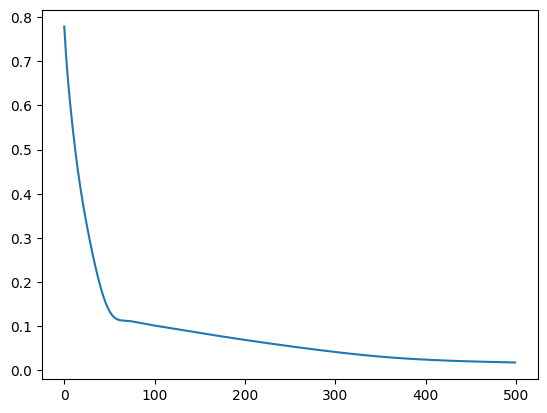

In [19]:
plt.plot(loss_values)
plt.show()

In [20]:
print(model.fc1.weight)

Parameter containing:
tensor([[ 0.6888],
        [ 1.8537],
        [-2.2482],
        [-0.7047],
        [-2.7584],
        [-0.3826],
        [-0.4908],
        [-0.4202]], requires_grad=True)
